In [1]:
import pandas as pd

data = pd.read_csv('chipotle.tsv', sep='\t')

#### 1. Вывести кол-во наблюдений в датасете

In [2]:
len(data)

4622

#### 2. Вывести названия столбцов

In [3]:
print(*data.columns, sep=', ')

order_id, quantity, item_name, choice_description, item_price


#### 3. Определить самую частую позицию (item) в заказе

In [4]:
data['item_name'].mode()[0]

'Chicken Bowl'

#### 4. Построить гистограмму частоты заказов по позициям (item)

<AxesSubplot:>

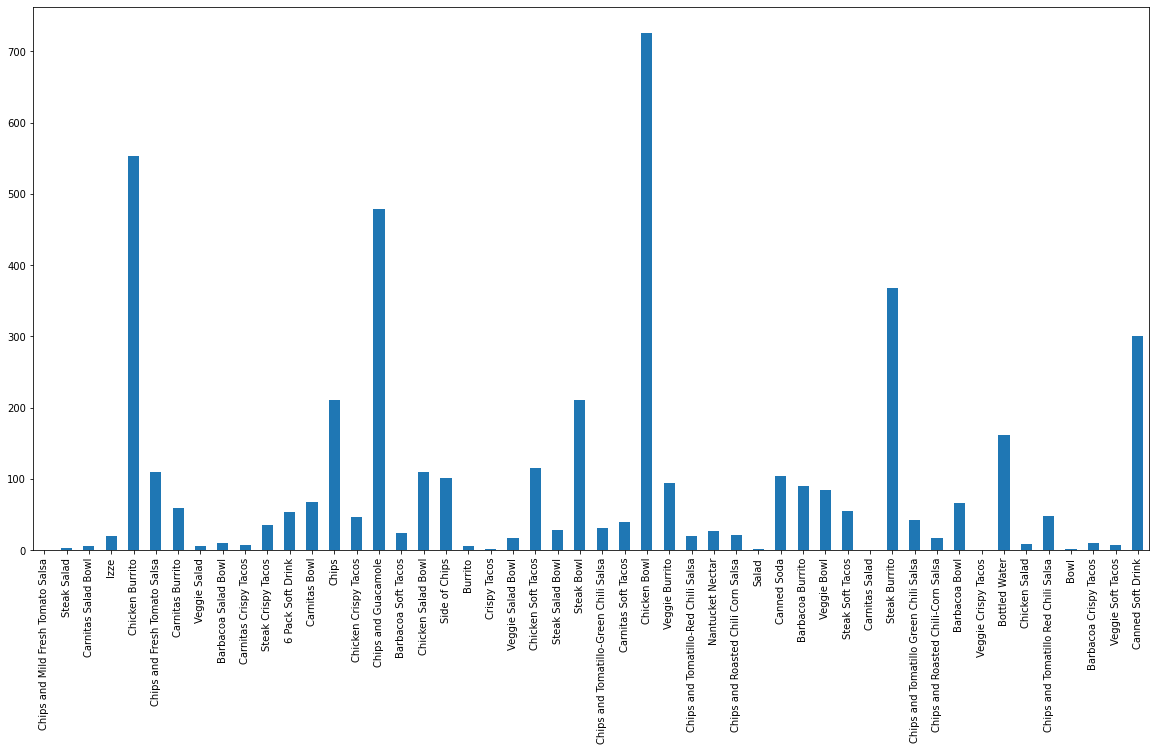

In [5]:
data['item_name'].value_counts(sort=False).plot(kind='bar', figsize=(20, 10))

#### 5. Измените тип переменной item_price с помощью лямбды функции

In [6]:
data['item_price'] = data['item_price'].apply(lambda x: float(x[1:]))

data

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

<AxesSubplot:xlabel='item_name'>

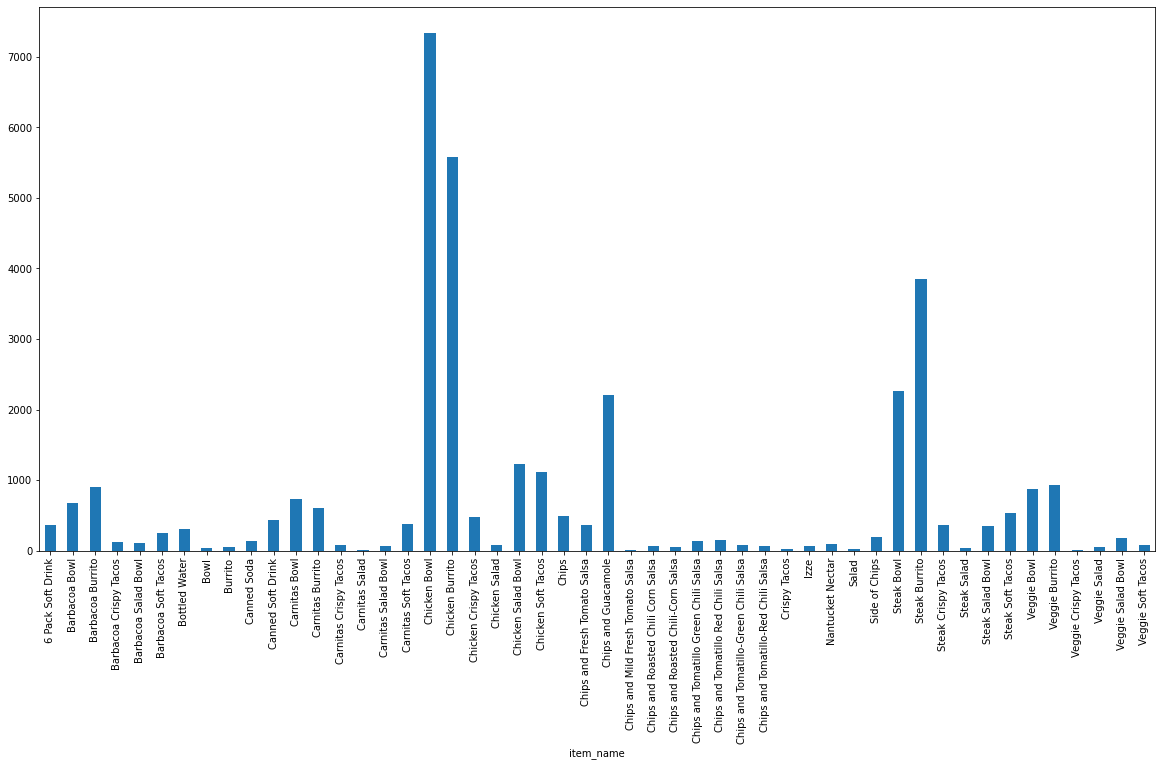

In [7]:
data.groupby('item_name')['item_price'].sum().plot(kind='bar', figsize=(20, 10))

#### 7. Средняя сумма заказа? (2 способа)

In [8]:
avg_1 = data.groupby('order_id')['item_price'].sum().mean()
avg_2 = data['item_price'].sum() / data['order_id'].nunique()

avg_1, avg_2

(18.811428571428568, 18.811428571428575)

#### 8. Выведите среднее, минимальное и максимальное, медианное значения числа уникальных позиций в заказе

In [9]:
data.groupby('order_id')['item_name'].nunique().apply(['mean', 'min', 'max', 'median'])

mean      2.34024
min       1.00000
max       8.00000
median    2.00000
Name: item_name, dtype: float64

#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.

In [10]:
def get_doneness(description: str) -> str:
    degrees = ['Mild', 'Medium', 'Hot']
    return next((degree
        for degree in degrees
        if degree in description), 'Other')


steaks = data[data['item_name'].str.startswith('Steak')].copy()
steaks['item_price'] /= steaks['quantity']

steaks['doneness'] = [get_doneness(description)
    for description in steaks['choice_description']]

In [11]:
steaks.groupby('item_name')[['quantity', 'item_price']].describe()

quantity                                               \
                      count      mean       std  min  25%  50%  75%  max   
item_name                                                                  
Steak Bowl            211.0  1.047393  0.234278  1.0  1.0  1.0  1.0  3.0   
Steak Burrito         368.0  1.048913  0.239889  1.0  1.0  1.0  1.0  3.0   
Steak Crispy Tacos     35.0  1.028571  0.169031  1.0  1.0  1.0  1.0  2.0   
Steak Salad             4.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
Steak Salad Bowl       29.0  1.068966  0.257881  1.0  1.0  1.0  1.0  2.0   
Steak Soft Tacos       55.0  1.018182  0.134840  1.0  1.0  1.0  1.0  2.0   

                   item_price                                                  \
                        count       mean       std   min    25%    50%    75%   
item_name                                                                       
Steak Bowl              211.0  10.232559  1.280389  8.69  9.250   9.25  11.75   
Steak Burrito           368.0   9.993424  1.234669  8.69  8.990   9.25  11.75   
Steak Crispy Tacos       35.0   9.952857  1.241225  8.69  8.990   9.25  11.75   
Steak Salad               4.0   8.915000  0.150000  8.69  8.915   8.99   8.99   
Steak Salad Bowl         29.0  11.027931  1.209313  9.39  9.390  11.89  11.89   
Steak Soft Tacos         55.0   9.578182  0.937307  8.99  9.120   9.25   9.25   

                           
                      max  
item_name                  
Steak Bowl          11.75  
Steak Burrito       11.75  
Steak Crispy Tacos  11.75  
Steak Salad          8.99  
Steak Salad Bowl    11.89  
Steak Soft Tacos    11.75

In [12]:
steaks.groupby('doneness')[['quantity', 'item_price']].describe()

quantity                                              item_price  \
            count      mean       std  min  25%  50%  75%  max      count   
doneness                                                                    
Hot          46.0  1.043478  0.206185  1.0  1.0  1.0  1.0  2.0       46.0   
Medium       86.0  1.058140  0.280950  1.0  1.0  1.0  1.0  3.0       86.0   
Mild        105.0  1.038095  0.192344  1.0  1.0  1.0  1.0  2.0      105.0   
Other       465.0  1.045161  0.227674  1.0  1.0  1.0  1.0  3.0      465.0   

                                                               
               mean       std   min   25%   50%    75%    max  
doneness                                                       
Hot        9.193478  0.716098  8.69  8.99  8.99   8.99  11.48  
Medium     9.272558  0.806699  8.69  8.99  8.99   8.99  11.48  
Mild       9.592190  1.060035  8.69  8.99  8.99  11.08  11.48  
Other     10.408065  1.259136  8.69  9.25  9.25  11.75  11.89

#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.

In [13]:
data['item_price_rub'] = data['item_price'] * 73.4506

data

,order_id,quantity,item_name,choice_description,item_price,item_price_rub
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,175.546934
1,1,1,Izze,[Clementine],3.39,248.997534
2,1,1,Nantucket Nectar,[Apple],3.39,248.997534
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,175.546934
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1247.191188
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,863.044550
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,863.044550
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,826.319250
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,642.692750


#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарки.

In [14]:
data.groupby('item_name').agg({'order_id': 'unique'})

,order_id
item_name,
6 Pack Soft Drink,"[129, 148, 154, 168, 182, 230, 264, 298, 306, ..."
Barbacoa Bowl,"[19, 27, 42, 51, 56, 61, 97, 110, 182, 202, 24..."
Barbacoa Burrito,"[11, 36, 53, 57, 65, 98, 108, 146, 163, 167, 1..."
Barbacoa Crispy Tacos,"[75, 110, 186, 205, 315, 343, 419, 756, 768, 1..."
Barbacoa Salad Bowl,"[501, 541, 576, 738, 970, 1283, 1346, 1426, 1751]"
Barbacoa Soft Tacos,"[26, 82, 117, 252, 353, 406, 467, 475, 506, 54..."
Bottled Water,"[17, 38, 138, 143, 163, 203, 225, 244, 270, 28..."
Bowl,"[193, 279]"
Burrito,"[214, 217, 279, 313]"


In [15]:
steaks.groupby('doneness').agg({'order_id': 'unique'})

,order_id
doneness,
Hot,"[21, 29, 30, 32, 38, 67, 112, 122, 130, 180, 1..."
Medium,"[23, 31, 45, 47, 52, 55, 66, 78, 85, 87, 100, ..."
Mild,"[16, 22, 25, 80, 84, 140, 152, 155, 156, 194, ..."
Other,"[4, 5, 20, 28, 37, 40, 48, 71, 83, 92, 95, 103..."


#### 12. Определить цену по каждой позиции в отдельности.

In [16]:
temp_data = data.copy()
temp_data['item_price'] /= temp_data['quantity']

temp_data.groupby('item_name').agg({'item_price': 'unique'})

,item_price
item_name,
6 Pack Soft Drink,[6.49]
Barbacoa Bowl,"[11.75, 9.25, 8.99, 11.48, 8.69, 11.49]"
Barbacoa Burrito,"[8.99, 9.25, 11.75, 11.08, 8.69, 11.48]"
Barbacoa Crispy Tacos,"[11.75, 9.25, 11.48, 8.99]"
Barbacoa Salad Bowl,"[11.89, 9.39]"
Barbacoa Soft Tacos,"[9.25, 8.99, 11.75, 11.48]"
Bottled Water,"[1.09, 1.5]"
Bowl,"[7.3999999999999995, 7.4]"
Burrito,[7.4]


### Алгоритмы уменьшения размерности 

#### Повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf).

#### Необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.

Running UMAP on COIL-20 took 27.55973505973816 seconds
Running UMAP on MNIST took 85.98829364776611 seconds
Running UMAP on F-MNIST took 77.62249279022217 seconds
Running UMAP on word2vec took 29.968441486358643 seconds
Running TSNE on COIL-20 took 28.276598691940308 seconds
Running TSNE on MNIST took 2377.8905198574066 seconds
Running TSNE on F-MNIST took 2503.2102591991425 seconds
Running TSNE on word2vec took 444.5266098976135 seconds
Running PCA on COIL-20 took 1.2825310230255127 seconds
Running PCA on MNIST took 2.9094536304473877 seconds
Running PCA on F-MNIST took 2.8700475692749023 seconds
Running PCA on word2vec took 0.5265512466430664 seconds


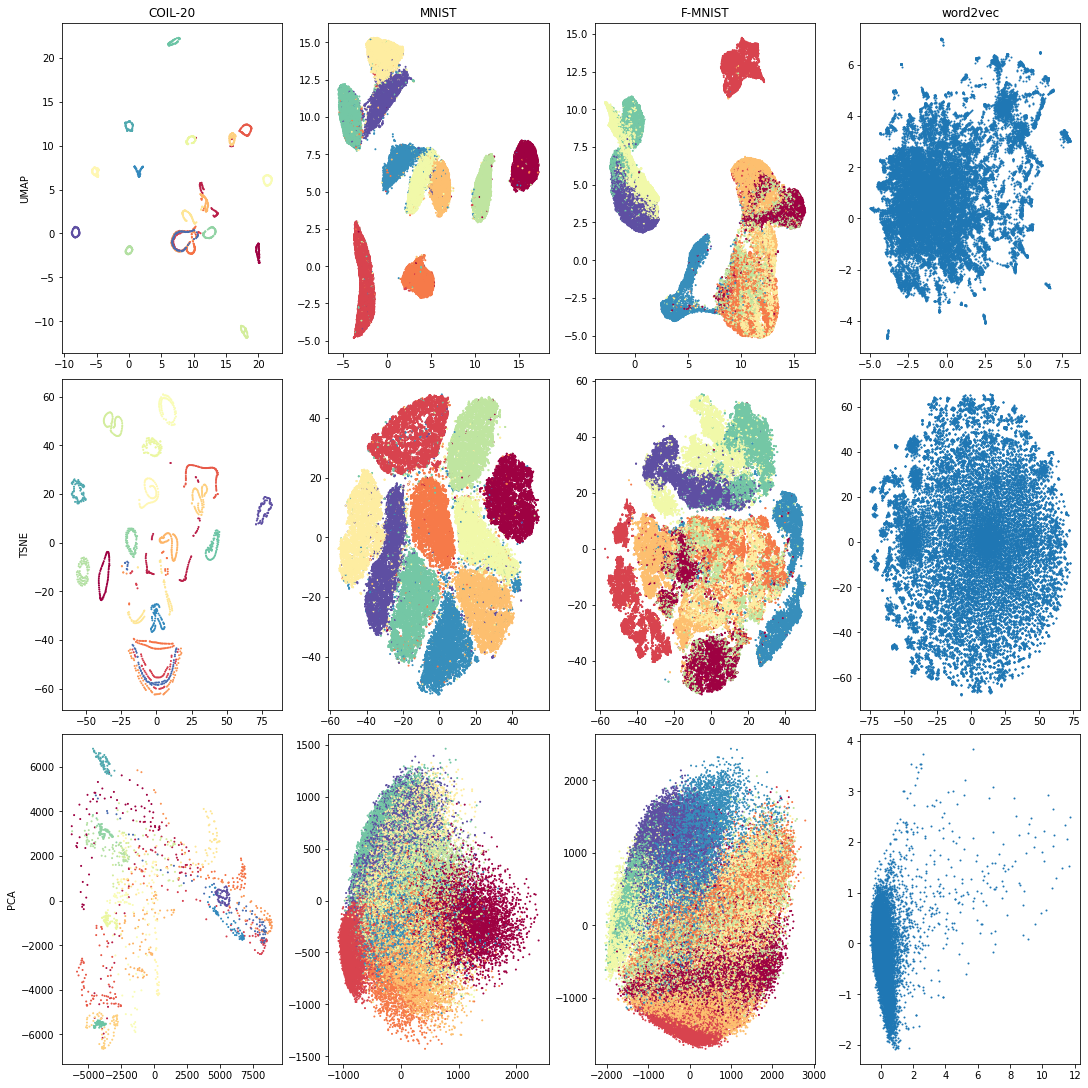

In [17]:
# Datasets: https://drive.google.com/drive/folders/1TyKJZcPlsGlhqPvRHvNBqg9Ci3N10n7B
# Labels: https://drive.google.com/drive/folders/18VMOWxdJ-hV2ccgaYxZu_d0WEpmcQzQV

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time
import umap

datasets = {
    'COIL-20': (
        np.load('_datasets/coil-20.npz')['arr_0'].astype(np.float64),
        pd.read_csv('_labels/coil-20.csv')['label']
    ),
    'MNIST': (
        np.load('_datasets/mnist.npz')['arr_0'].astype(np.float64),
        pd.read_csv('_labels/mnist.csv')['label']
    ),
    'F-MNIST': (
        np.load('_datasets/f-mnist.npz')['arr_0'].astype(np.float64),
        pd.read_csv('_labels/f-mnist.csv')['label']
    ),
    'word2vec': (
        np.load('_datasets/word2vec.npz')['arr_0'][:30_000].astype(np.float64),
        None
    )
}

reducers = {
    'UMAP': umap.UMAP(random_state=42),
    'TSNE': TSNE(random_state=42, n_jobs=-1),
    'PCA': PCA(n_components=2),
}

_, axs = plt.subplots(nrows=len(reducers),
                      ncols=len(datasets),
                      squeeze=False,
                      constrained_layout=True,
                      figsize=(15, 15))

for i, (algo_name, algo) in enumerate(reducers.items()):
    for j, (dataset_name, (dataset, labels)) in enumerate(datasets.items()):
        now = time.time()
        decreased = algo.fit_transform(dataset)
        elapsed = time.time() - now

        print(f'Running {algo_name} on {dataset_name} took {elapsed} seconds')

        axs[i, j].scatter(x=decreased[:, 0],
                          y=decreased[:, 1],
                          s=1.0,
                          c=labels,
                          cmap='Spectral')

for ax, dataset in zip(axs[0], datasets):
    ax.set_title(dataset)

for ax, algo in zip(axs[:, 0], reducers):
    ax.set_ylabel(algo)

plt.show()